Data in `../v2_bifdat_1par` and `../v2_bifdat_2par`.

For each directory, full bifurcation diagram data is in `full`, reduced in `redu`. This file will clean both and focus only on 2 par.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 2)

In [2]:
# get places where data is disjoint
def get_disjoint_idx(dat,dx=.1,dy=.1):
    """
    assume write points data two par (not allpts data) from XPP, no oscillations
    """
    x_idx = np.where(np.abs(np.diff(dat[:,0]))>dx)
    y_idx = np.where(np.abs(np.diff(dat[:,1]))>dy)
    fig,axs = plt.subplots(figsize=(4,2))
    axs.plot(np.diff(dat[:,0]),label='x diff')
    axs.plot(np.diff(dat[:,1]),label='y diff')
    axs.legend()
    plt.show()
    return np.union1d(x_idx[0],y_idx[0])

In [269]:
# get places where data changes direction abruptly
# specifically, where the velocity vector changes rapidly (e.g., flips)
def get_direction_change_idx(dat,dtheta=.1):
    """
    assume write points data two par (not allpts data) from XPP, no oscillations
    """
    velocity = np.diff(dat[:,:2],axis=0)

    # angle of velocity
    theta = np.arctan2(velocity[:,1],velocity[:,0])

    diff = np.mod(np.diff(theta)+np.pi,2*np.pi)-np.pi

    idx = np.where(np.abs(diff)>dtheta)[0]
    
    fig,axs = plt.subplots(figsize=(4,2))
    axs.plot(np.abs(diff),label='theta abs diff')
    axs.axhline(dtheta,ls='--',color='gray',label='treshold')
    # axs.plot(theta,label='theta')
    axs.legend()
    plt.show()
    return idx

In [191]:
# get places where data changes magnitude abruptly
def get_magnitude_change_idx(dat,dx=.1):
    """
    assume write points data two par (not allpts data) from XPP, no oscillations
    """
    pts = np.linalg.norm(np.diff(dat[:,:2],axis=0),axis=1)

    idx = np.where(pts>dx)[0]+1
    
    fig,axs = plt.subplots(figsize=(4,2))
    axs.plot(pts,label='velocity norm')
    axs.legend()
    plt.show()
    return idx

In [192]:
def exclude_small_idx_range(idxs,min_neighbors = 10):
    """
    Remove idx from idxs if neighbors are too close.
    Helpful when there are too many curves with small numbers of points
    """

    idxs_new = []

    if idxs[1]-idxs[0] > min_neighbors:
        idxs_new.append(idxs[0])

    for i in range(1,len(idxs)-1):
        if (idxs[i]-idxs[i-1] > min_neighbors) and (idxs[i+1]-idxs[i] > min_neighbors):
            idxs_new.append(idxs[i])

    if idxs[-1]-idxs[-2] > min_neighbors:
        idxs_new.append(idxs[-1])
    return np.array(idxs_new)
    

In [193]:
def disjoint_curves_list(dat,idxs):
    """
    collect curves. +1 and -1 is to exclude the discontinuous point
    length_threshold: if number of elements in curve is less than length_threshold, discard.
    """
    disjoint_curves = []
    disjoint_curves.append(dat[:idxs[0]-1,:2])
    
    for i in range(1,len(idxs)):
        disjoint_curves.append(dat[idxs[i-1]+1:idxs[i]-1,:2])

    disjoint_curves.append(dat[idxs[-1]+1:,:2])
    return disjoint_curves

In [194]:
def plot_disjoint_curves(disjoint_curves):
    fig,axs = plt.subplots(figsize=(4,2))
    for i in range(len(disjoint_curves)):
        axs.plot(disjoint_curves[i][:,1],disjoint_curves[i][:,0],label=str(i))
    axs.set_xlabel('delta')
    axs.set_ylabel('eps')
    # axs.set_xlim(0,.1)
    # axs.set_ylim(-.02,.02)
    axs.legend()

# CGL1 Full

This section serves as a documentation and template for all other sections.

Load 2 parameter diagram for $\delta<0$ and $\delta>0$ (neg, pos, respectively.)

## 1:1

In [8]:
ratio = '11'
fname = '../v2_bifdat_2par/full/cgl1f_'+ratio+'_{}.dat'

cgl1f_neg = np.loadtxt(fname.format('neg'))
cgl1f_pos = np.loadtxt(fname.format('pos'))

### 1:1 neg

In [9]:
dat = cgl1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

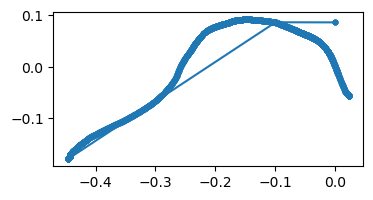

In [10]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [11]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

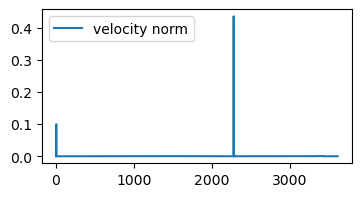

In [12]:
idxs2 = get_magnitude_change_idx(dat,dx=.01)

Get union of large angle and magnitude change.

In [13]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [14]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [15]:
print(idxs)

[   5 2278]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [16]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

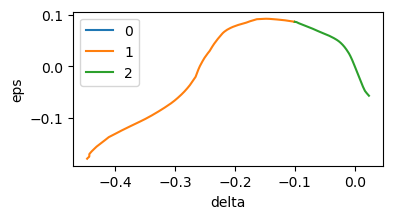

In [17]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to keep curves 1 and 2.

Create a new empty array, concatenate curves 1 and 2 in a consistent order, save to file.

In [18]:
curves = np.concatenate([disjoint_curves[1][::-1,:],disjoint_curves[2]])

In [19]:
y,x = curves.T
print(x,y)

[-0.446649  -0.446602  -0.446554  ...  0.023588   0.0236411  0.0236947] [-0.179441  -0.179375  -0.179309  ... -0.0570448 -0.057119  -0.0571935]


Plot to double check before saving

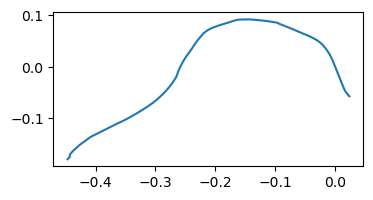

In [20]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [21]:
np.savetxt(fname_new,curves)

### 1:1 pos

In [22]:
dat = cgl1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

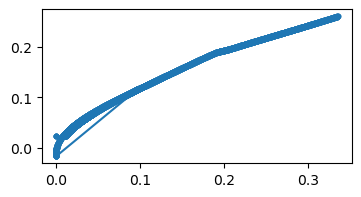

In [23]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

[[ 0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [-1.00e-07  0.00e+00]
 ...
 [ 8.90e-05  1.74e-04]
 [ 8.80e-05  1.74e-04]
 [ 8.90e-05  1.74e-04]]


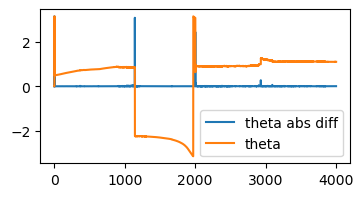

In [24]:
idxs1 = get_direction_change_idx(dat,dtheta=2)

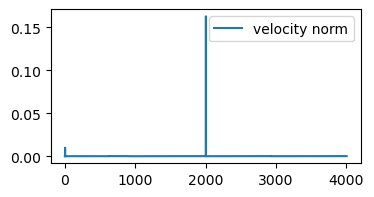

In [25]:
idxs2 = get_magnitude_change_idx(dat,dx=.002)

Get union of large angle and magnitude change.

In [26]:
idxs = np.union1d(idxs1,idxs2)
print(idxs)

[   1    5 1144 2003 2005]


Exclude curves with small  numbers of points (these are usually false starts)

In [27]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [28]:
print(idxs)

[   1    5 1144 2003 2005]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [29]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

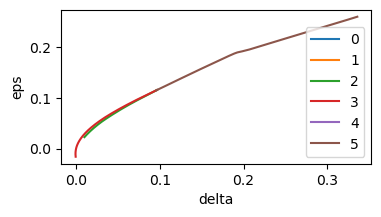

In [30]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to exclude curve index 2

In [31]:
curves = np.concatenate([disjoint_curves[5][::-1],disjoint_curves[4],disjoint_curves[3]])

In [32]:
y,x = curves.T

Plot to double check before saving

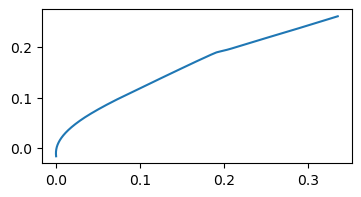

In [33]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [34]:
np.savetxt(fname_new,curves)

## 2:1

### 2:1 neg

In [35]:
ratio = '21'
fname = '../v2_bifdat_2par/full/cgl1f_'+ratio+'_{}.dat'

cgl1f_neg = np.loadtxt(fname.format('neg'))
cgl1f_pos = np.loadtxt(fname.format('pos'))

In [36]:
dat = cgl1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

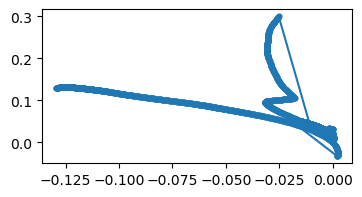

In [37]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [38]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

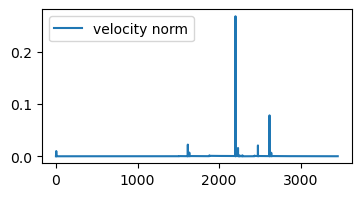

In [39]:
idxs2 = get_magnitude_change_idx(dat,dx=.01)

Get union of large angle and magnitude change.

In [40]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [41]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [42]:
print(idxs)

[1617 2201 2232 2476 2618]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [43]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

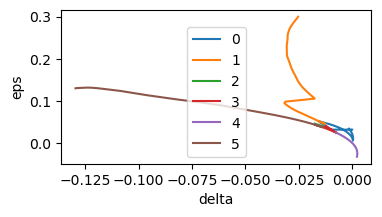

In [44]:
plot_disjoint_curves(disjoint_curves)

Keep curve indices 4,5

In [45]:
curves = np.concatenate([disjoint_curves[4][::-1,:],disjoint_curves[5]])

In [47]:
y,x = curves.T

Plot to double check before saving

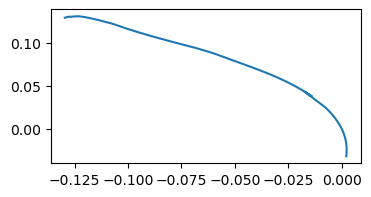

In [48]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [49]:
np.savetxt(fname_new,curves)

### 2:1 pos

In [50]:
dat = cgl1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

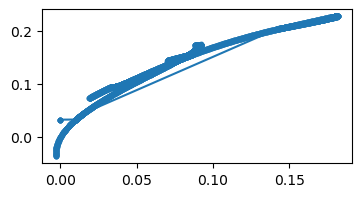

In [51]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

[[-1.000e-07  0.000e+00]
 [-1.000e-07  0.000e+00]
 [-1.000e-07  0.000e+00]
 ...
 [-6.334e-04  2.567e-05]
 [-6.326e-04  2.821e-05]
 [-6.301e-04  3.087e-05]]


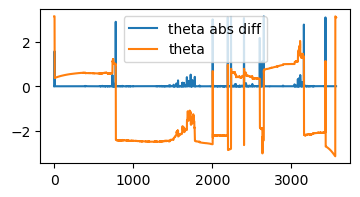

In [61]:
idxs1 = get_direction_change_idx(dat,dtheta=2)

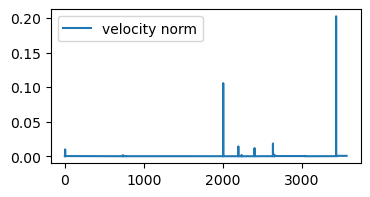

In [62]:
idxs2 = get_magnitude_change_idx(dat,dx=.002)

Get union of large angle and magnitude change.

In [64]:
idxs = np.union1d(idxs1,idxs2)

Exclude curves with small  numbers of points (these are usually false starts)

In [65]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [66]:
print(idxs)

[   5  777 2003 2004 2005 2194 2195 2196 2235 2399 2400 2401 2599 2634
 2650 2652 3157 3430 3431 3433]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [67]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

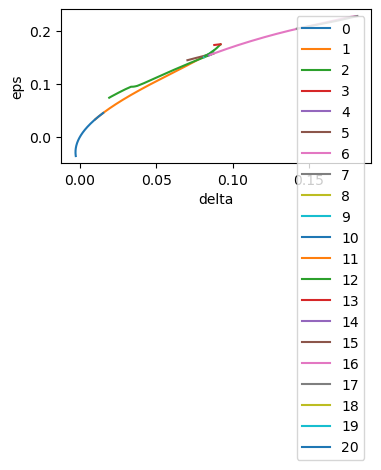

In [78]:
plot_disjoint_curves(disjoint_curves)

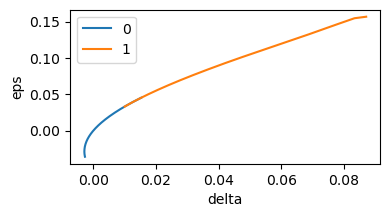

In [84]:
plot_disjoint_curves([disjoint_curves[20],disjoint_curves[1]])

keep indices 0, 20

In [94]:
curves = np.concatenate([disjoint_curves[1][::-1],disjoint_curves[20]])

In [95]:
y,x = curves.T

Plot to double check before saving

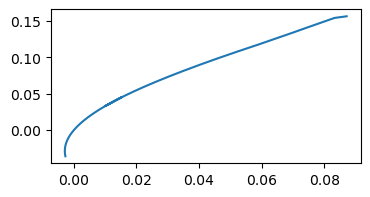

In [96]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [97]:
np.savetxt(fname_new,curves)

## 3:1

### 3:1 neg

In [195]:
ratio = '31'
fname = '../v2_bifdat_2par/full/cgl1f_'+ratio+'_{}.dat'

cgl1f_neg = np.loadtxt(fname.format('neg'))
cgl1f_pos = np.loadtxt(fname.format('pos'))

In [196]:
dat = cgl1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

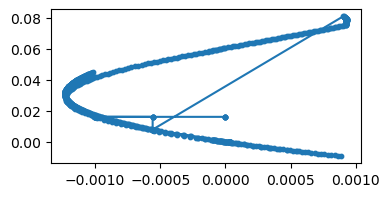

In [197]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

[[-1.00e-07  0.00e+00]
 [-1.00e-07  0.00e+00]
 [-1.00e-07  0.00e+00]
 ...
 [ 9.83e-05  2.85e-06]
 [ 9.84e-05  2.87e-06]
 [ 9.86e-05  2.89e-06]]


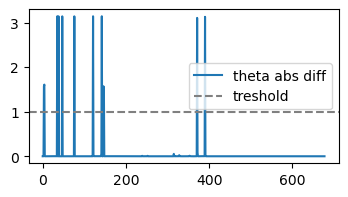

In [199]:
idxs1 = get_direction_change_idx(dat,dtheta=1)

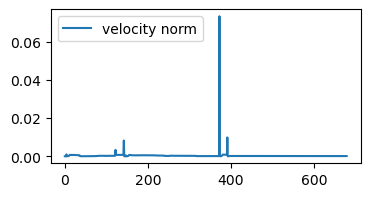

In [200]:
idxs2 = get_magnitude_change_idx(dat,dx=.001)

In [201]:
idxs = np.union1d(idxs1,idxs2)

Exclude curves with small  numbers of points (these are usually false starts)

In [202]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [203]:
print(idxs)

[  3   4  35  38  47  76 121 123 142 143 146 147 371 373 390 392]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [204]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

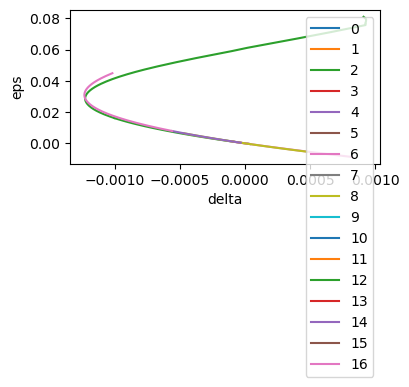

In [205]:
plot_disjoint_curves(disjoint_curves)

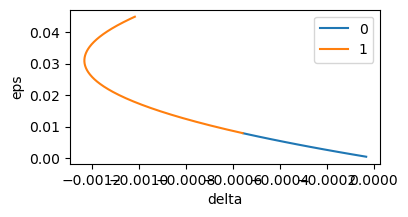

In [213]:
plot_disjoint_curves([disjoint_curves[14],disjoint_curves[16]])

Keep curve indices 14,16

In [220]:
curves = np.concatenate([disjoint_curves[14][::-1],disjoint_curves[16]])

In [221]:
y,x = curves.T

Plot to double check before saving

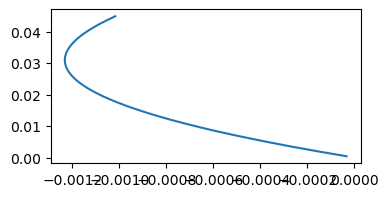

In [222]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [223]:
np.savetxt(fname_new,curves)

### 2:1 pos

In [224]:
dat = cgl1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

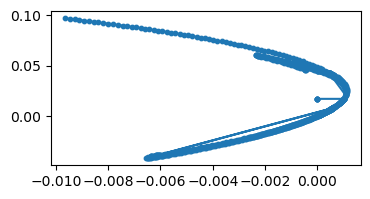

In [225]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

[[ 0.0000e+00  0.0000e+00]
 [ 1.0000e-07  0.0000e+00]
 [ 0.0000e+00  0.0000e+00]
 ...
 [ 5.8290e-04 -1.8451e-04]
 [ 5.8010e-04 -1.8564e-04]
 [ 5.7470e-04 -1.8588e-04]]


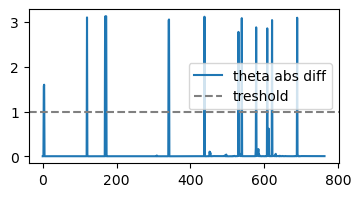

In [227]:
idxs1 = get_direction_change_idx(dat,dtheta=1)

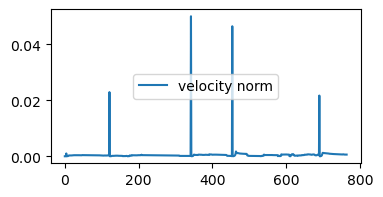

In [228]:
idxs2 = get_magnitude_change_idx(dat,dx=.002)

Get union of large angle and magnitude change.

In [229]:
idxs = np.union1d(idxs1,idxs2)

Exclude curves with small  numbers of points (these are usually false starts)

In [230]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [231]:
print(idxs)

[  3   4 120 122 169 171 172 341 342 343 438 455 530 539 578 608 621 689
 691]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [232]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

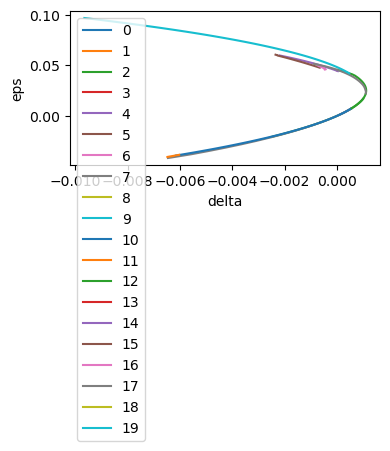

In [233]:
plot_disjoint_curves(disjoint_curves)

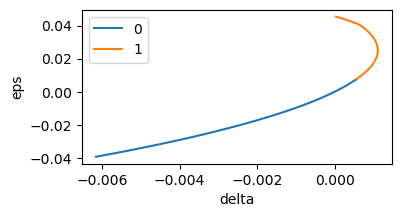

In [239]:
plot_disjoint_curves([disjoint_curves[10],disjoint_curves[12]])

keep indices 10,12

In [240]:
curves = np.concatenate([disjoint_curves[10][::-1],disjoint_curves[12]])

In [241]:
y,x = curves.T

Plot to double check before saving

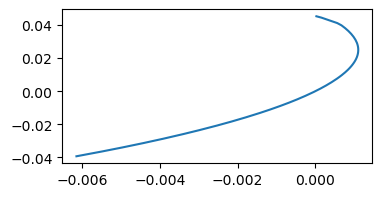

In [242]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [243]:
np.savetxt(fname_new,curves)

# CGL1 Reduced

## 1:1

In [350]:
ratio = '11'
fname = '../v2_bifdat_2par/redu/cgl1f_'+ratio+'_o2_{}.dat'

cgl1f_neg = np.loadtxt(fname.format('neg'))
cgl1f_pos = np.loadtxt(fname.format('pos'))

### 1:1 neg

In [351]:
dat = cgl1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

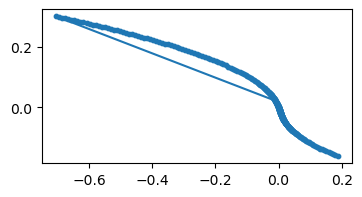

In [352]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [353]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

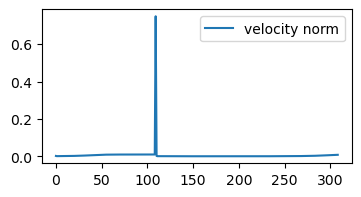

In [354]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [355]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [356]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [358]:
print(idxs)

[110]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [359]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

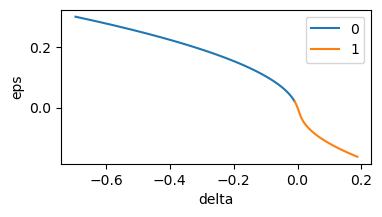

In [360]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to keep curves 1 and 2.

Create a new empty array, concatenate curves 1 and 2 in a consistent order, save to file.

In [361]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [362]:
y,x = curves.T

Plot to double check before saving

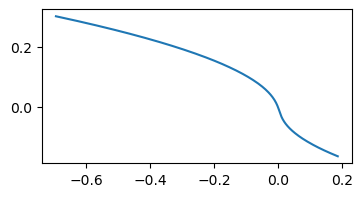

In [363]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [364]:
np.savetxt(fname_new,curves)

### 1:1 pos

In [270]:
dat = cgl1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

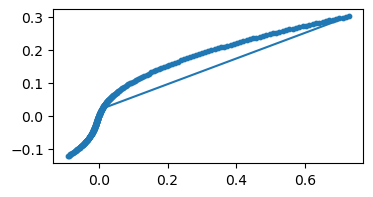

In [271]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

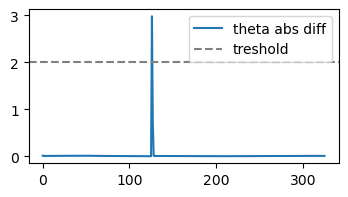

In [272]:
idxs1 = get_direction_change_idx(dat,dtheta=2)

In [278]:
print(idxs1)

[126]


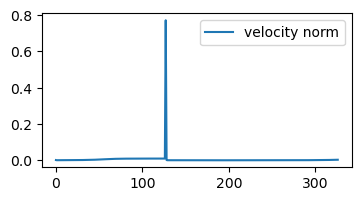

In [275]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [279]:
print(idxs2)

[128]


Get union of large angle and magnitude change.

In [281]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [282]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [283]:
print(idxs)

[128]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [284]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

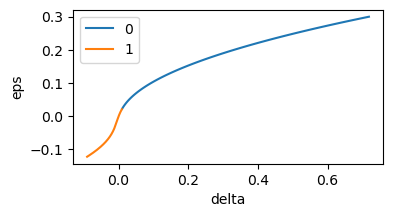

In [285]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to exclude curve index 2

In [287]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1]])

In [288]:
y,x = curves.T

Plot to double check before saving

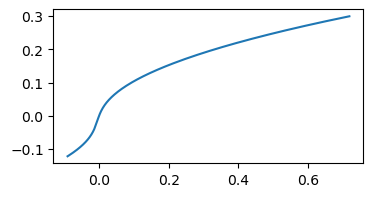

In [289]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [290]:
np.savetxt(fname_new,curves)

## 2:1

### 2:1 neg

In [292]:
ratio = '21'
fname = '../v2_bifdat_2par/redu/cgl1f_'+ratio+'_o2_{}.dat'

cgl1f_neg = np.loadtxt(fname.format('neg'))
cgl1f_pos = np.loadtxt(fname.format('pos'))

In [293]:
dat = cgl1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

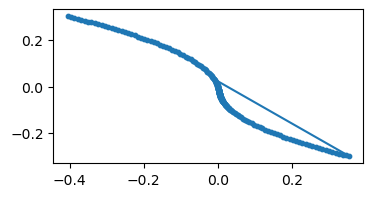

In [294]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [295]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

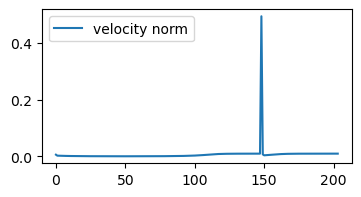

In [297]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [298]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [299]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [300]:
print(idxs)

[149]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [301]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

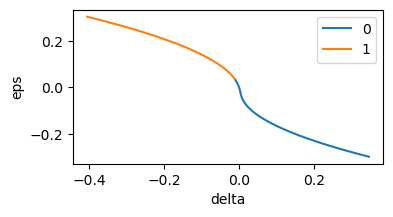

In [302]:
plot_disjoint_curves(disjoint_curves)

Keep curve indices 4,5

In [303]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [304]:
y,x = curves.T

Plot to double check before saving

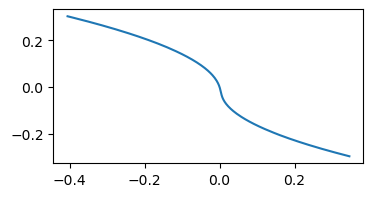

In [305]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [306]:
np.savetxt(fname_new,curves)

### 2:1 pos

In [307]:
dat = cgl1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

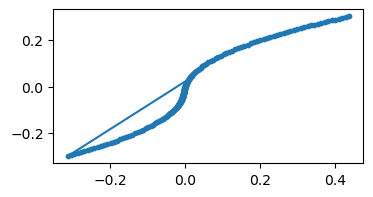

In [308]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

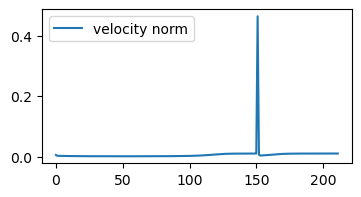

In [309]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [310]:
idxs = idxs2

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [311]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

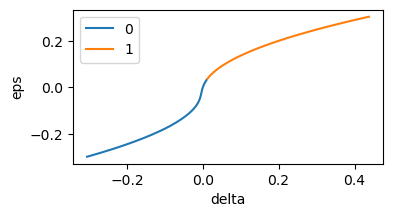

In [312]:
plot_disjoint_curves(disjoint_curves)

In [313]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1]])

In [314]:
y,x = curves.T

Plot to double check before saving

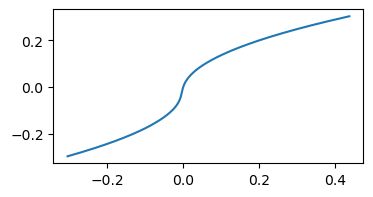

In [315]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [316]:
np.savetxt(fname_new,curves)

## 3:1

### 3:1 neg

In [317]:
ratio = '31'
fname = '../v2_bifdat_2par/redu/cgl1f_'+ratio+'_o2_{}.dat'

cgl1f_neg = np.loadtxt(fname.format('neg'))
cgl1f_pos = np.loadtxt(fname.format('pos'))

In [318]:
dat = cgl1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

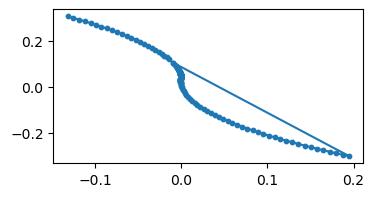

In [319]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

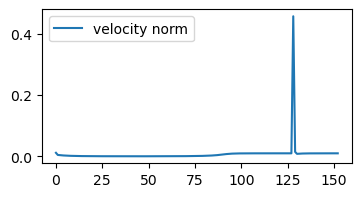

In [326]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [330]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [331]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

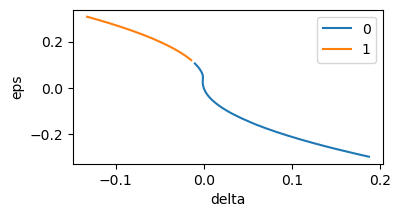

In [332]:
plot_disjoint_curves(disjoint_curves)

In [333]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1]])

In [334]:
y,x = curves.T

Plot to double check before saving

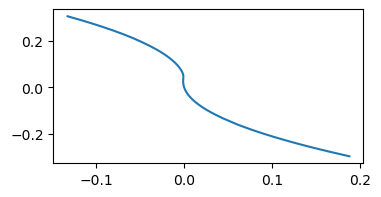

In [335]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [336]:
np.savetxt(fname_new,curves)

### 2:1 pos

In [337]:
dat = cgl1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

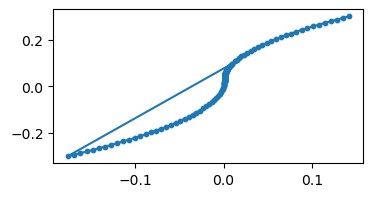

In [338]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

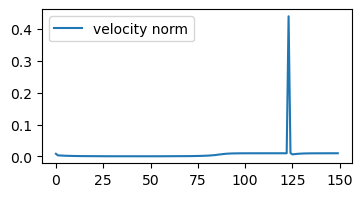

In [339]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [341]:
idxs = idxs2

In [343]:
print(idxs)

[124]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [344]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

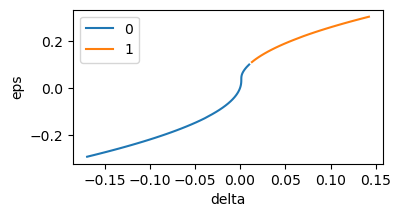

In [345]:
plot_disjoint_curves(disjoint_curves)

In [346]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1]])

In [347]:
y,x = curves.T

Plot to double check before saving

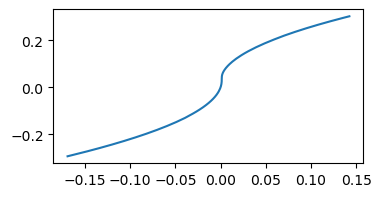

In [348]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [349]:
np.savetxt(fname_new,curves)